Assume that the middle region is solely dependent on the ratios of (h-d0), (h-d2), and radwidth to (h-d1), if the other regions exhibit good convergence.

1. Test this hypothesis by fixing these ratios and varying other values a lot (while maintiaining good region i0, i2, e convergence). Plot a histogram of the 1% convergence point for each ordered triple of these ratios and see that their variation is low.
2. If it holds, for a configuration with as many fixed values as possible, vary the three ratios, find informative ways to plot them, and try to find a function from their values to the convergence point.

In [ ]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [3]:
def random_m0(h):
  # want m0 * h < 30 if expecting some values near 1 for (h-d2)/h
  return random.uniform(low=0.0, high=(30/h))

def populate_d_a1(h, left_ratio, right_ratio, hmdr):
  hmd1 = random.uniform(low = 1., high = ((h-1)/1.2))
  hmd0 = left_ratio * hmd1
  hmd2 = right_ratio * hmd1
  radwidth0 = hmd0/random.uniform(low = 1., high = 3.)
  radwidth1 = hmd1/hmdr
  radwidth2 = hmd2/random.uniform(low = 1., high = 3.)
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a

def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

In [ ]:
# raw data generation
file1 = "histogram_data_1.pkl"

triples = [(i, j, k) for i in [2, 20] for j in [0.2, 0.99, 1.2] for k in [0.2, 0.99, 1.2]]
# (h-d1)/radwidth, (h-d0)/(h-d1), (h-d2)/(h-d1)

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [0, 1, 0]
rho = 1023

# fixed_prob_lsts = []

# for triple in triples:
#   hmdr = triple[0]
#   left_ratio = triple[1]
#   right_ratio = triple[2]
#   fixed_prob_lst = []
#   for j in range(50):
#     h = random.uniform(low = 10., high = 50.)
#     m0 = random_m0(h)
#     d, a = populate_d_a1(h, left_ratio, right_ratio, hmdr)
#     prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#     mk = prob.m_k
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 1,
#             "m0s" : [m0]}
#     print(j, info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     fixed_prob_lst.append(data_dict)
#   fixed_prob_lsts.append(fixed_prob_lst)
#   update_data_file(fixed_prob_lsts, file1)
#   print("Finished an hmdr-lr-rr triple.")

In [5]:
fixed_prob_lsts = open_pkl_file(file1)
for fixed_prob_lst in fixed_prob_lsts:
  generate_convergence_data(fixed_prob_lst, [0.01, 0.005])
  # Ignoring log data for now.
  # log_data = generate_log_data(fixed_prob_lst)

In [9]:
def histogram(data, hydro, error, ylab = "count", title = "convergence"):
  vals = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data]
  if min(vals) == max(vals):
    bins = [vals[0] - 0.5, vals[0] + 0.5]
  else:
    bins = np.arange(min(vals)-0.5, max(vals)+1.5, 1)
  plt.hist(vals, bins = bins, edgecolor = "black")
  plt.xlabel(f"convergence point {error:.2g} " + hydro)
  plt.ylabel(ylab)
  plt.title(hydro + " " + title)
  plt.show()
  return vals

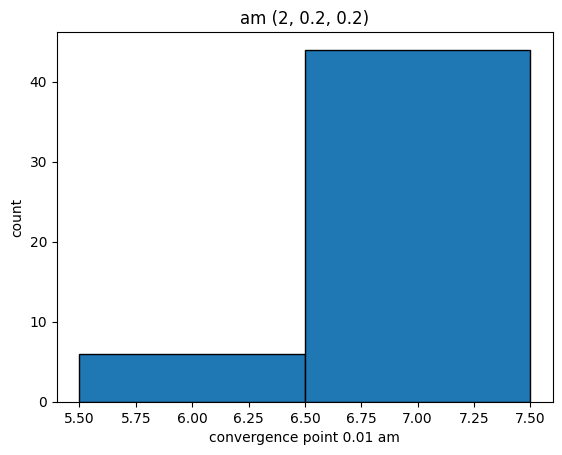

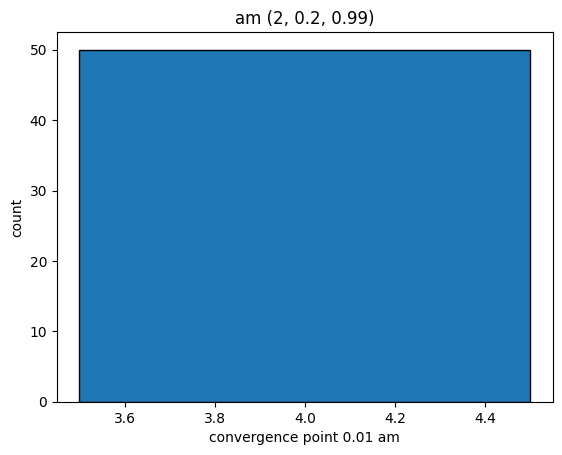

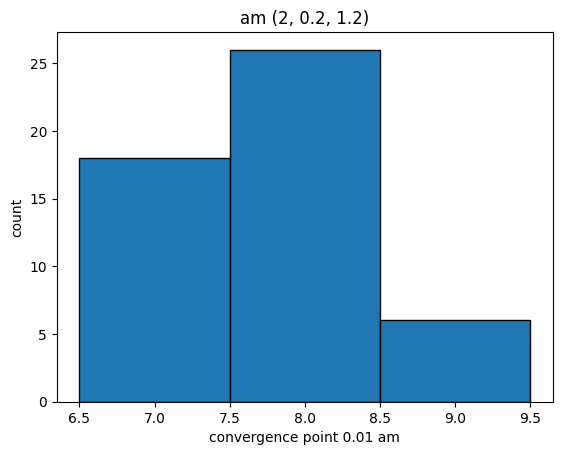

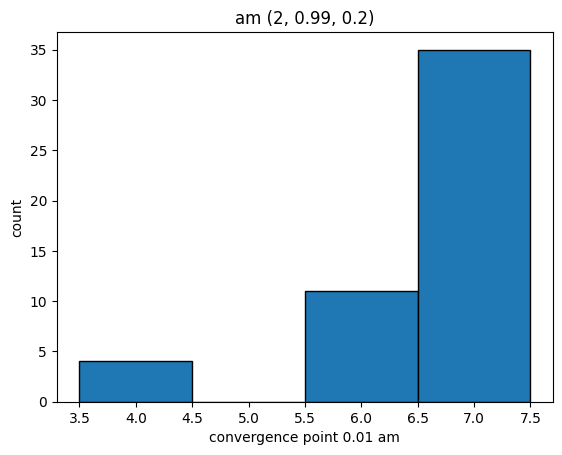

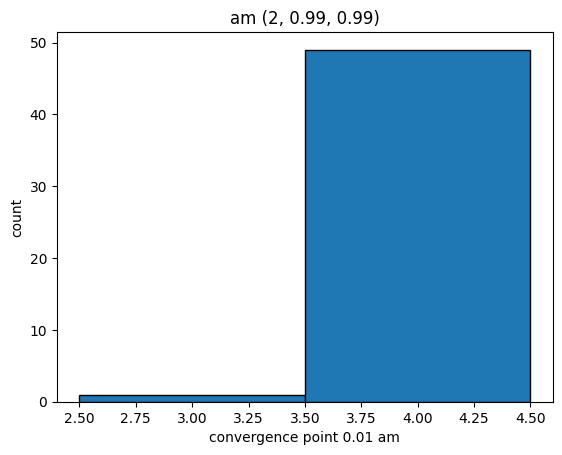

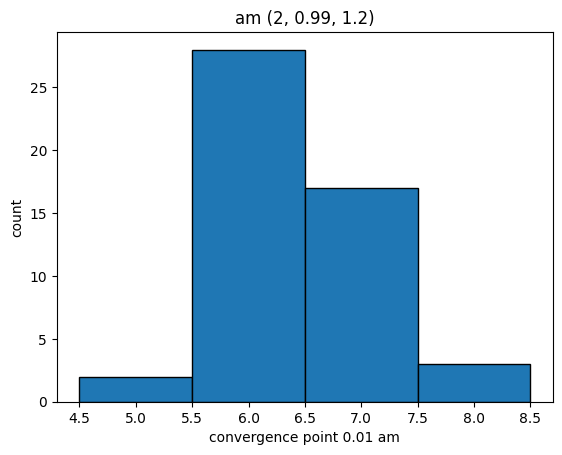

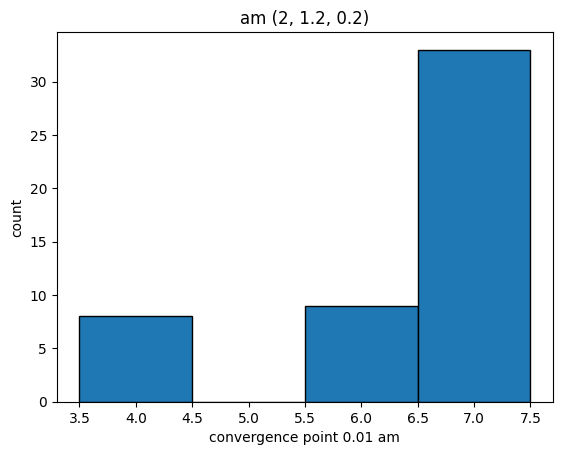

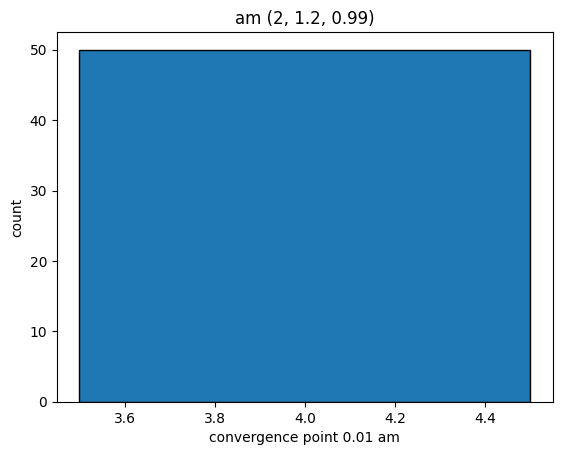

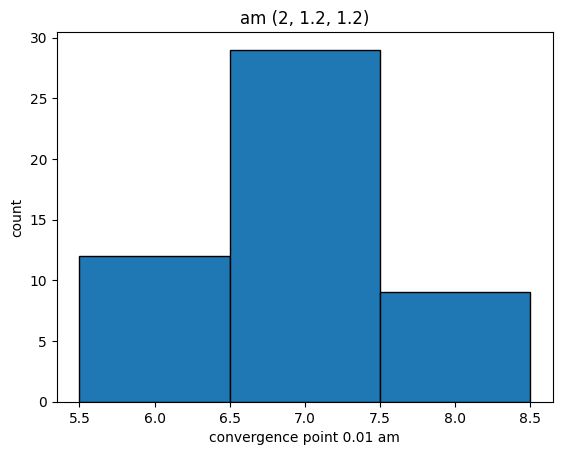

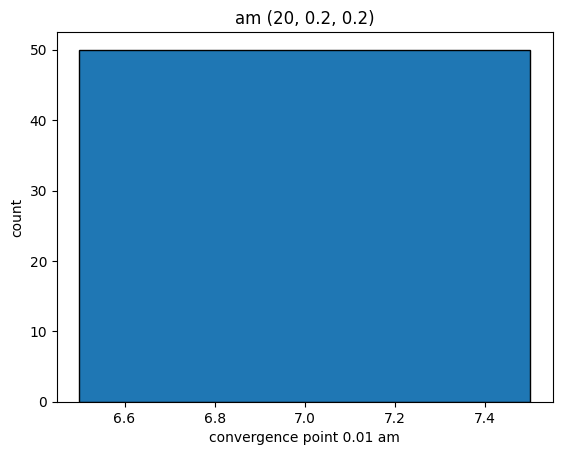

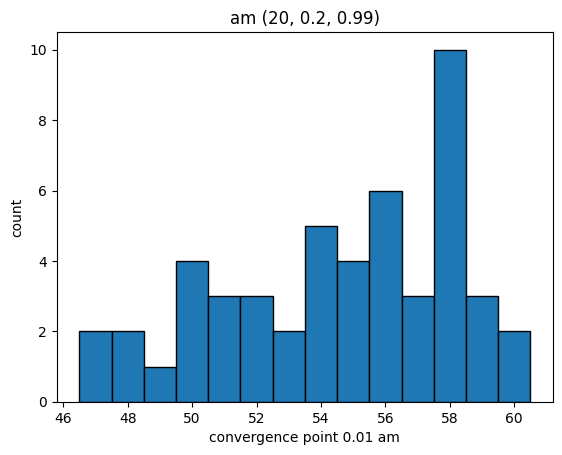

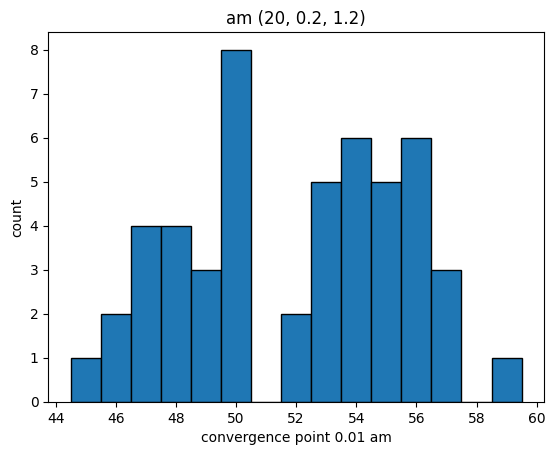

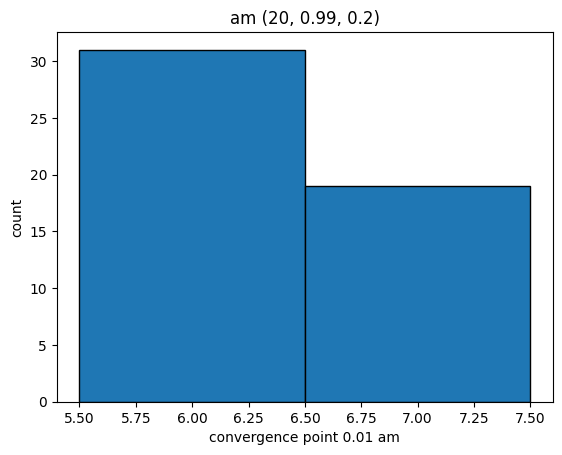

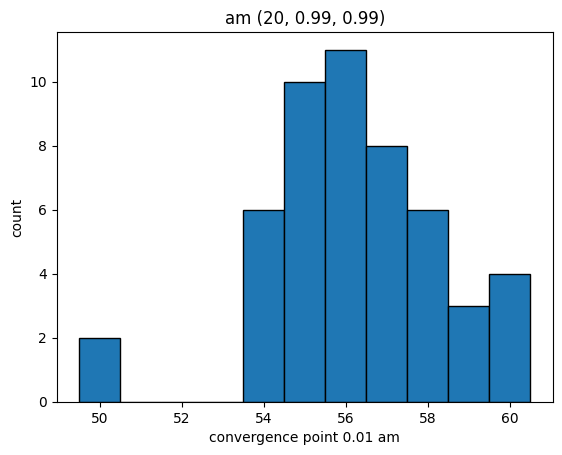

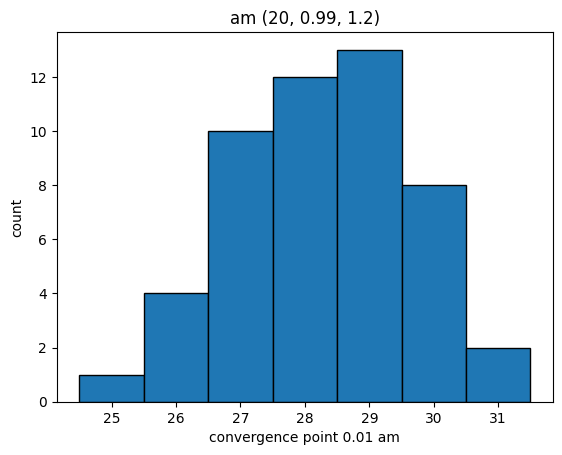

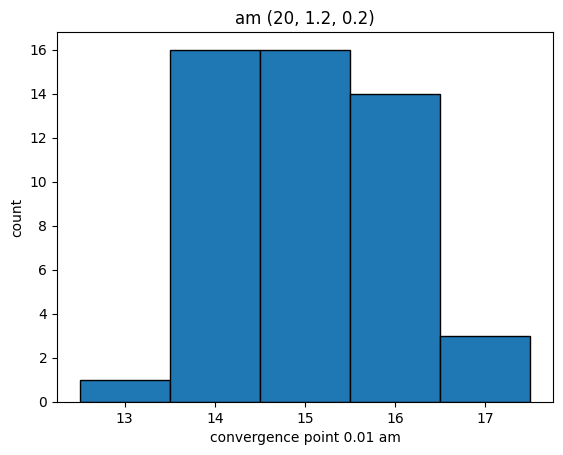

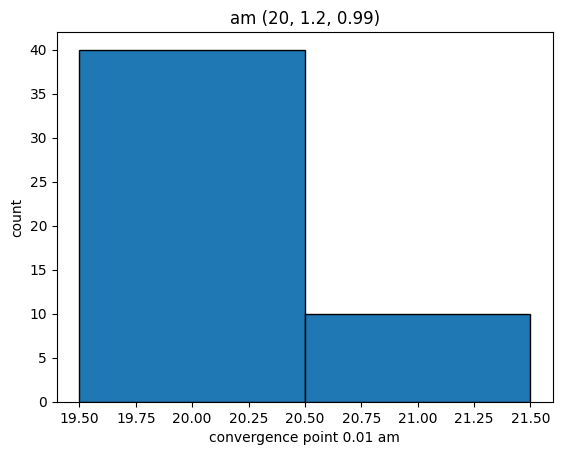

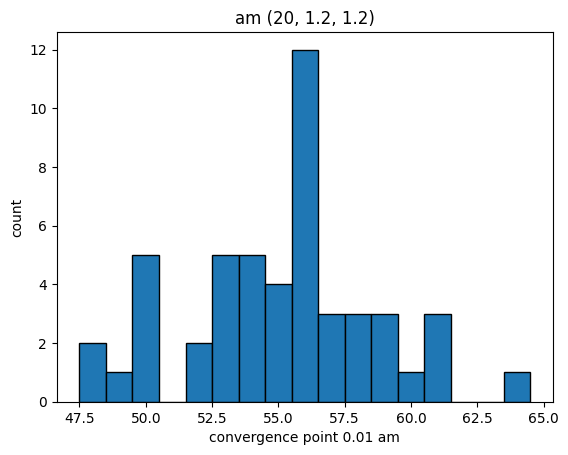

In [21]:
am_wide_variation_cases = []
for idx, triple in enumerate(triples):
  vals = histogram(fixed_prob_lsts[idx],"am", 0.01, ylab = "count", title = f"{triple}")
  if max(vals) - min(vals) > 7:
    am_wide_variation_cases.append(idx)

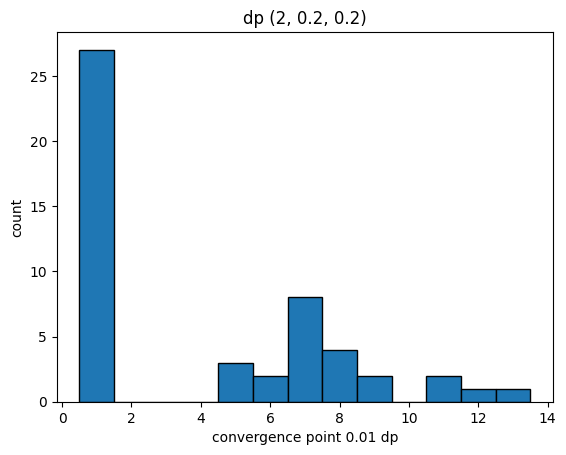

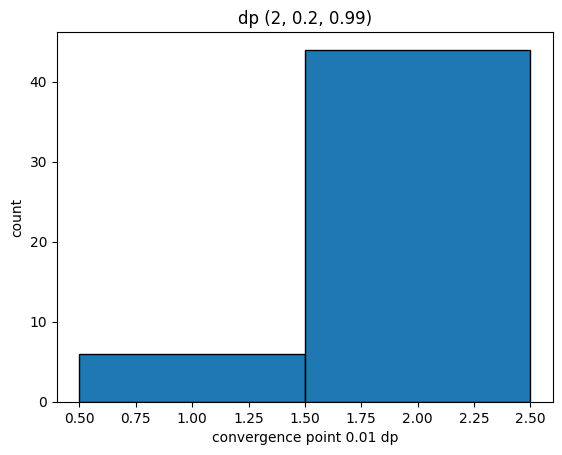

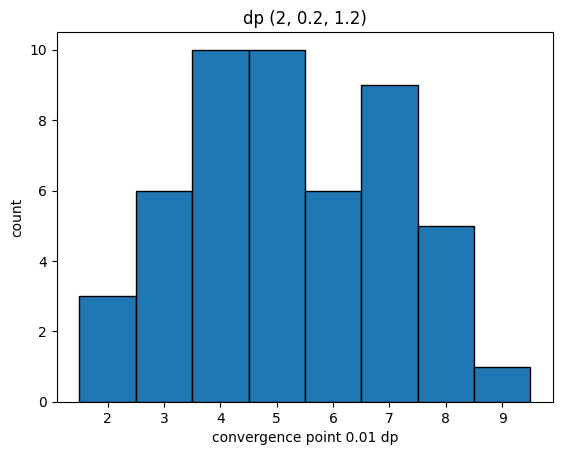

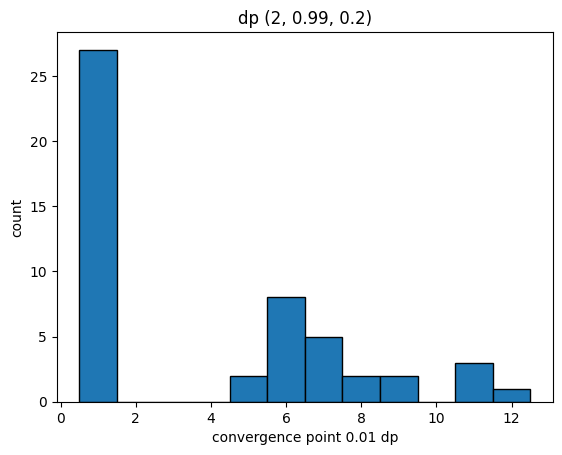

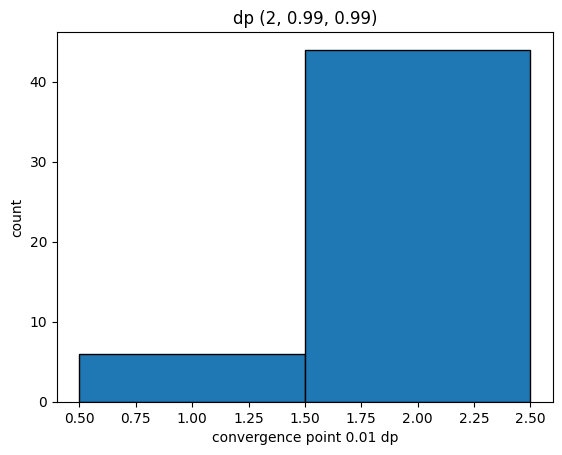

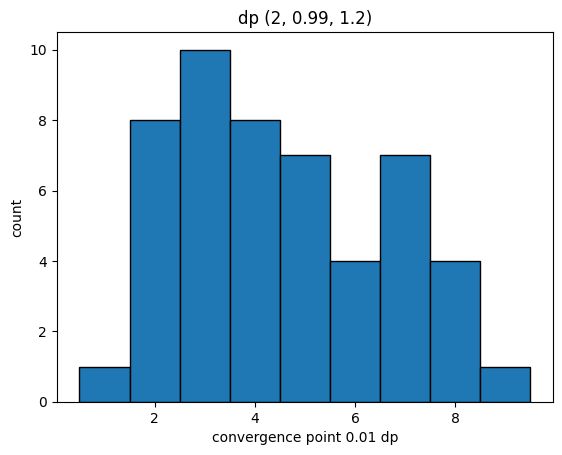

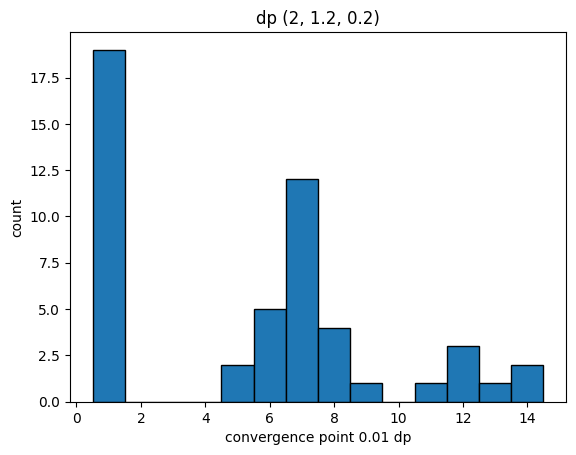

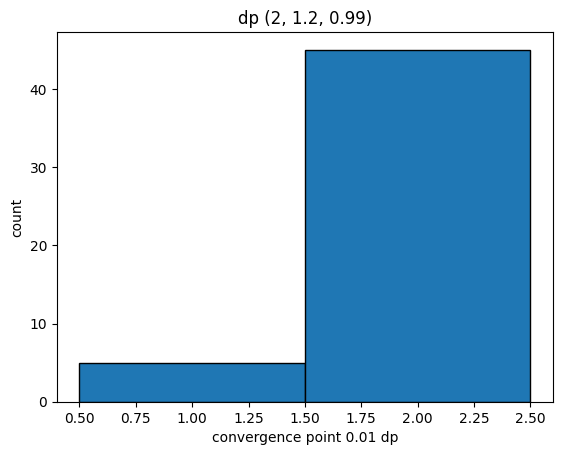

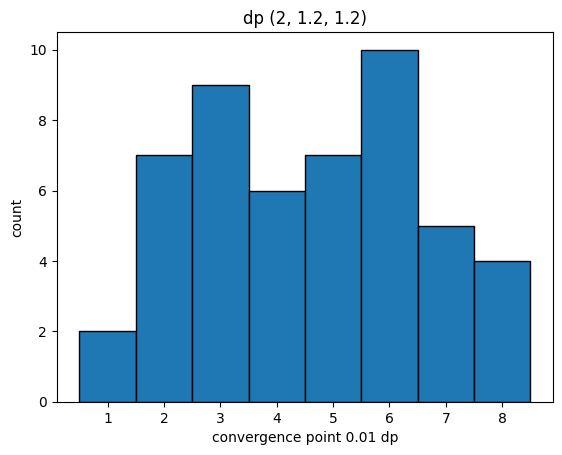

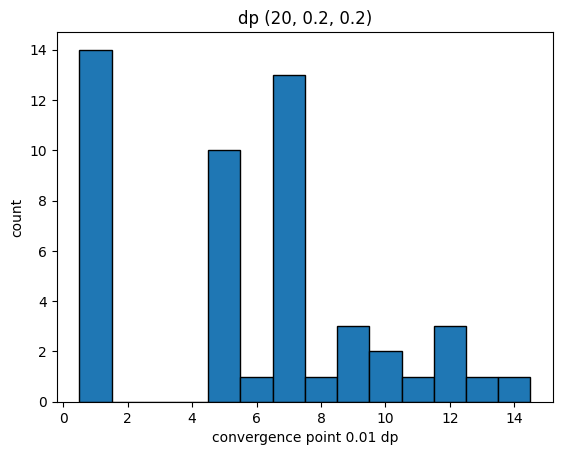

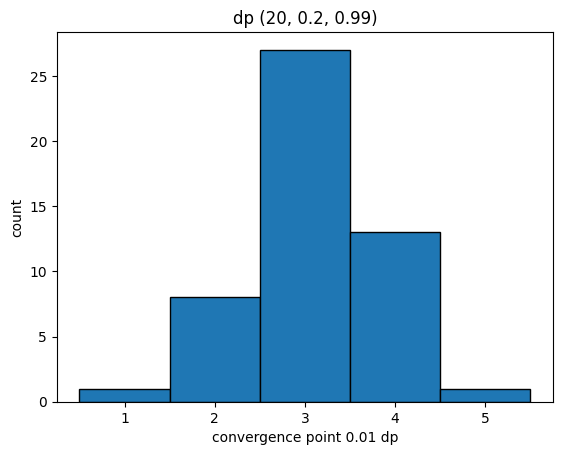

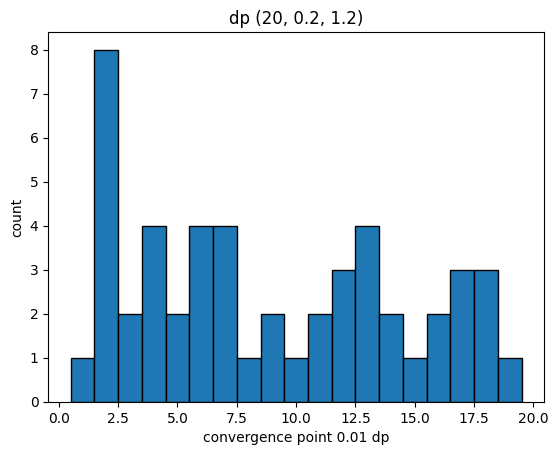

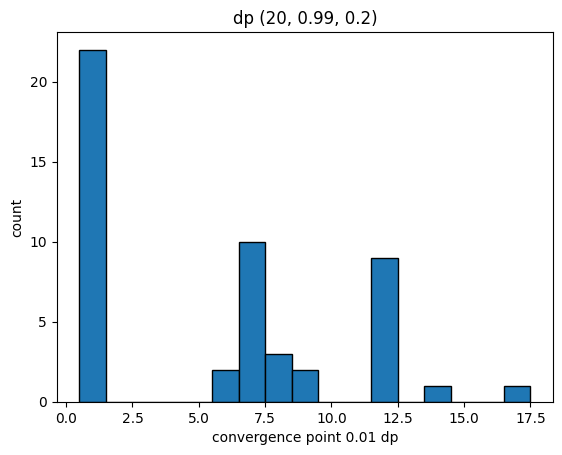

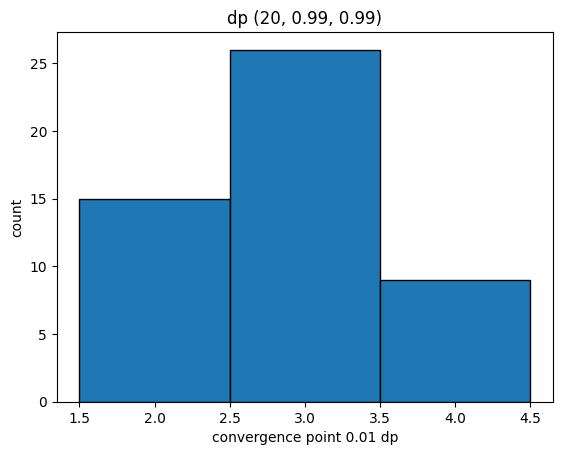

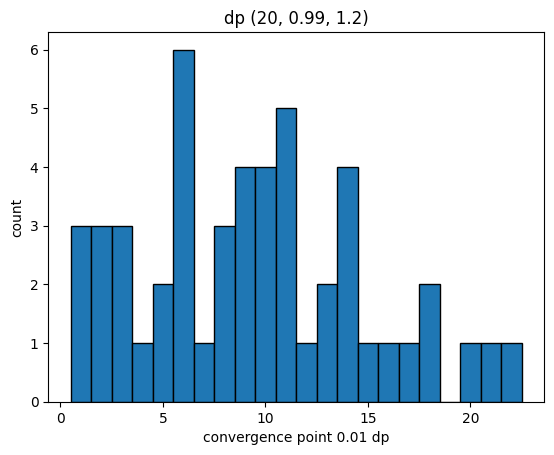

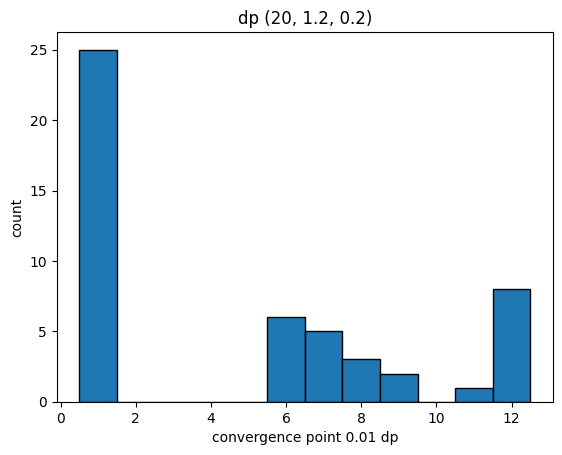

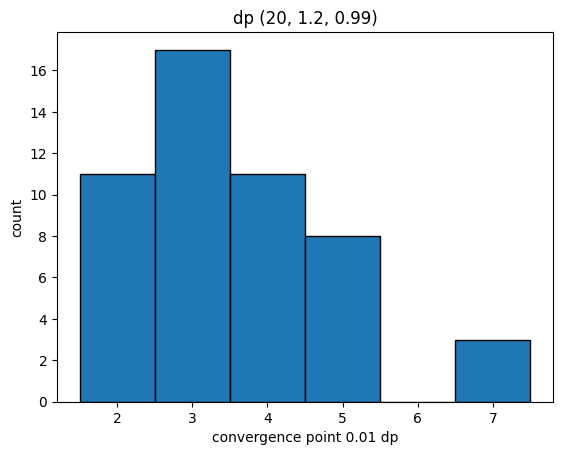

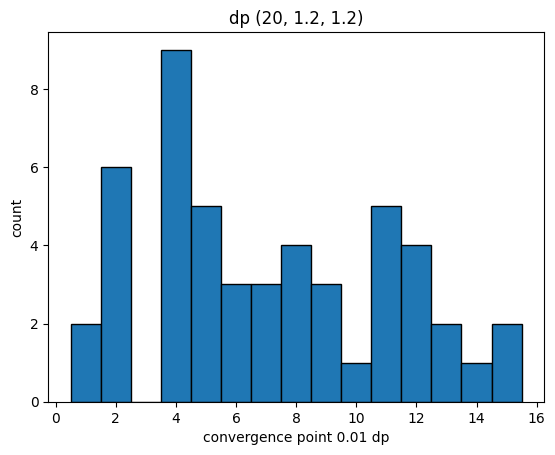

In [22]:
dp_wide_variation_cases = []
for idx, triple in enumerate(triples):
  vals = histogram(fixed_prob_lsts[idx],"dp", 0.01, ylab = "count", title = f"{triple}")
  if max(vals) - min(vals) > 7:
    dp_wide_variation_cases.append(idx)

In [34]:
def plot_varied_cases(fixed_prob_lsts, idx, hydro):
  subset = fixed_prob_lsts[idx].copy()
  val_func = lambda data: data[data["m0s"][0]]["convergence point 0.01 " + hydro]
  subset.sort(key = val_func)
  vals = [val_func(data) for data in subset]
  filter_and_plot_shapes(subset, lambda data_dict, m0 : True, 
                        lambda data_dict, m0 : get_plasma_color(data_dict[m0]["convergence point 0.01 " + hydro], min_value = min(vals), max_value=max(vals)),
                        ppr = 10, figsize_per_plot = (2, 2))
  xs = [(data_dict["a"][1] - data_dict["a"][0])/data_dict["a"][0] for data_dict in subset]
  ys = [data_dict[data_dict["m0s"][0]]["convergence point 0.01 " + hydro] for data_dict in subset]
  plt.plot(xs, ys)
  plt.xlabel("radwidth1/(radwidth0 + radwidth1)")
  plt.ylabel("convergence point")
  plt.show()

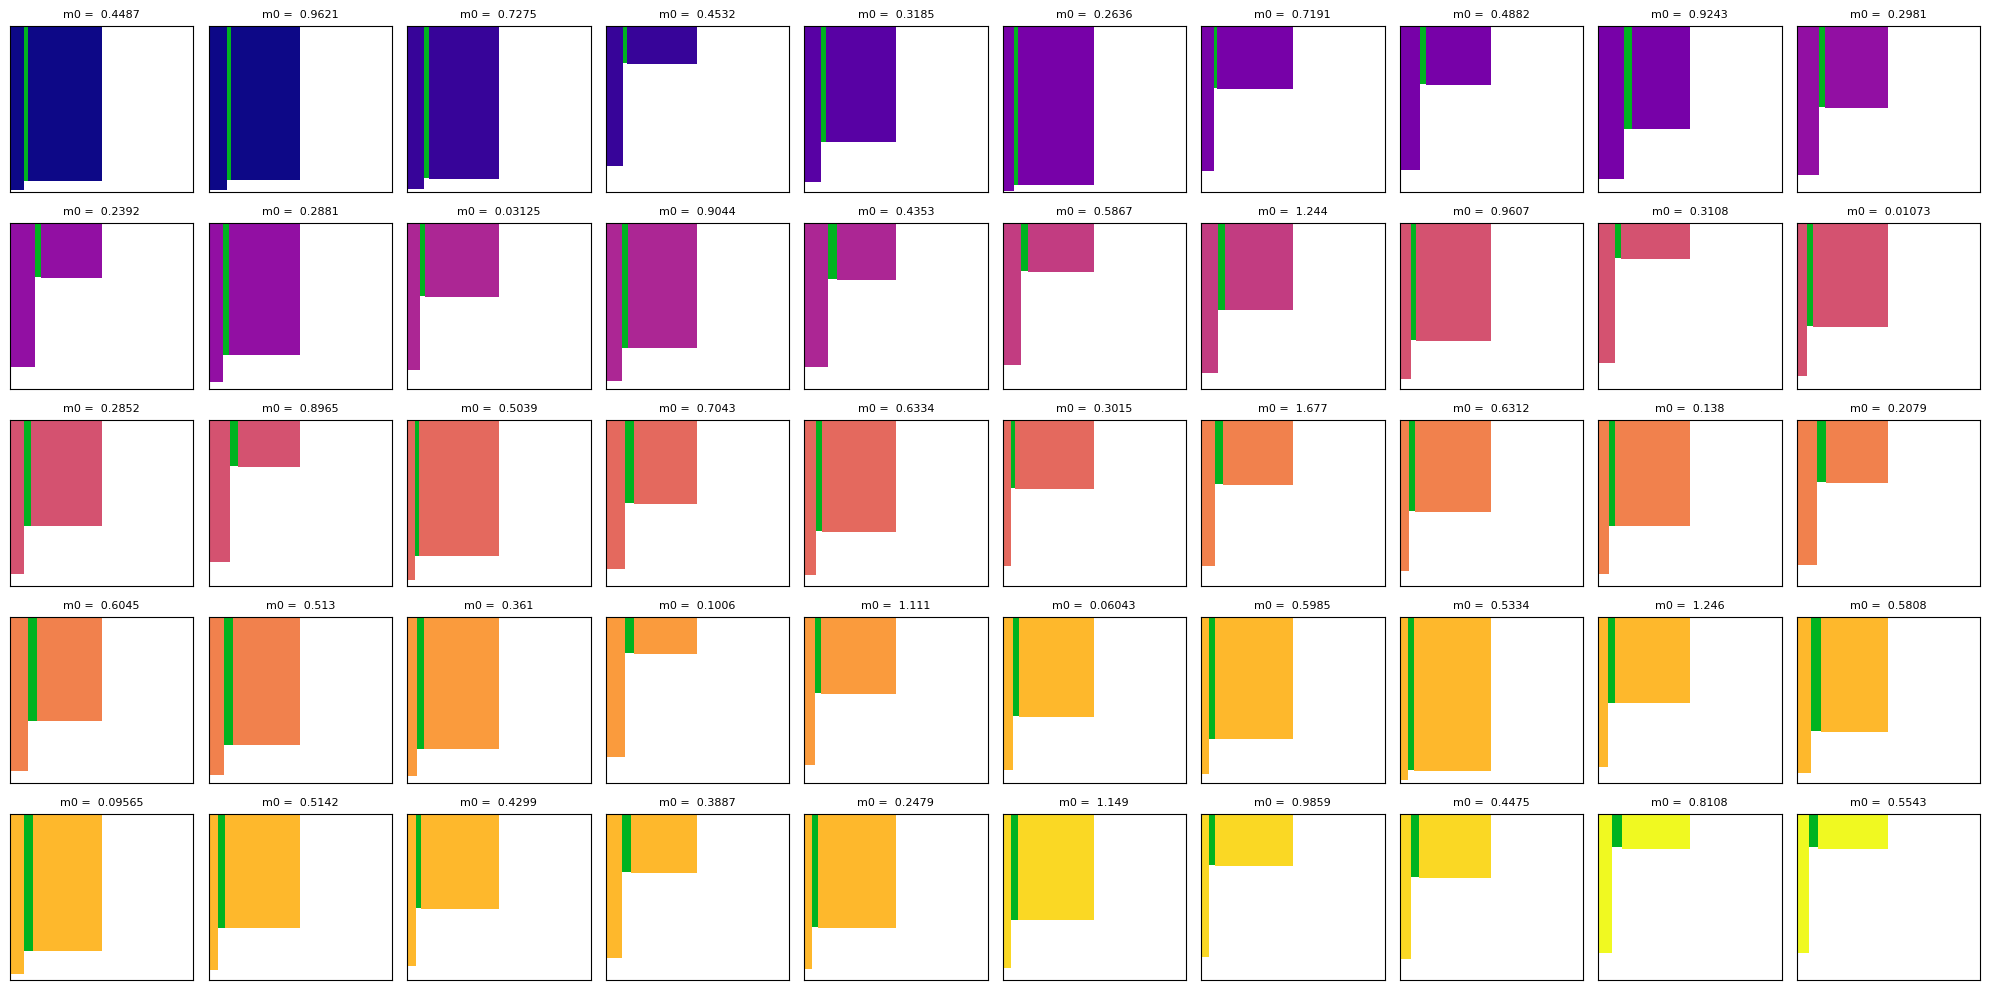

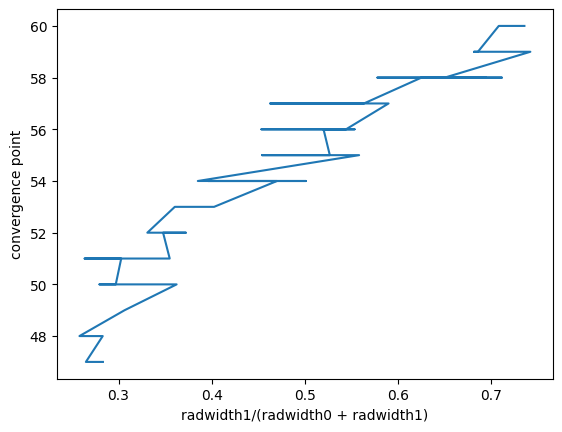

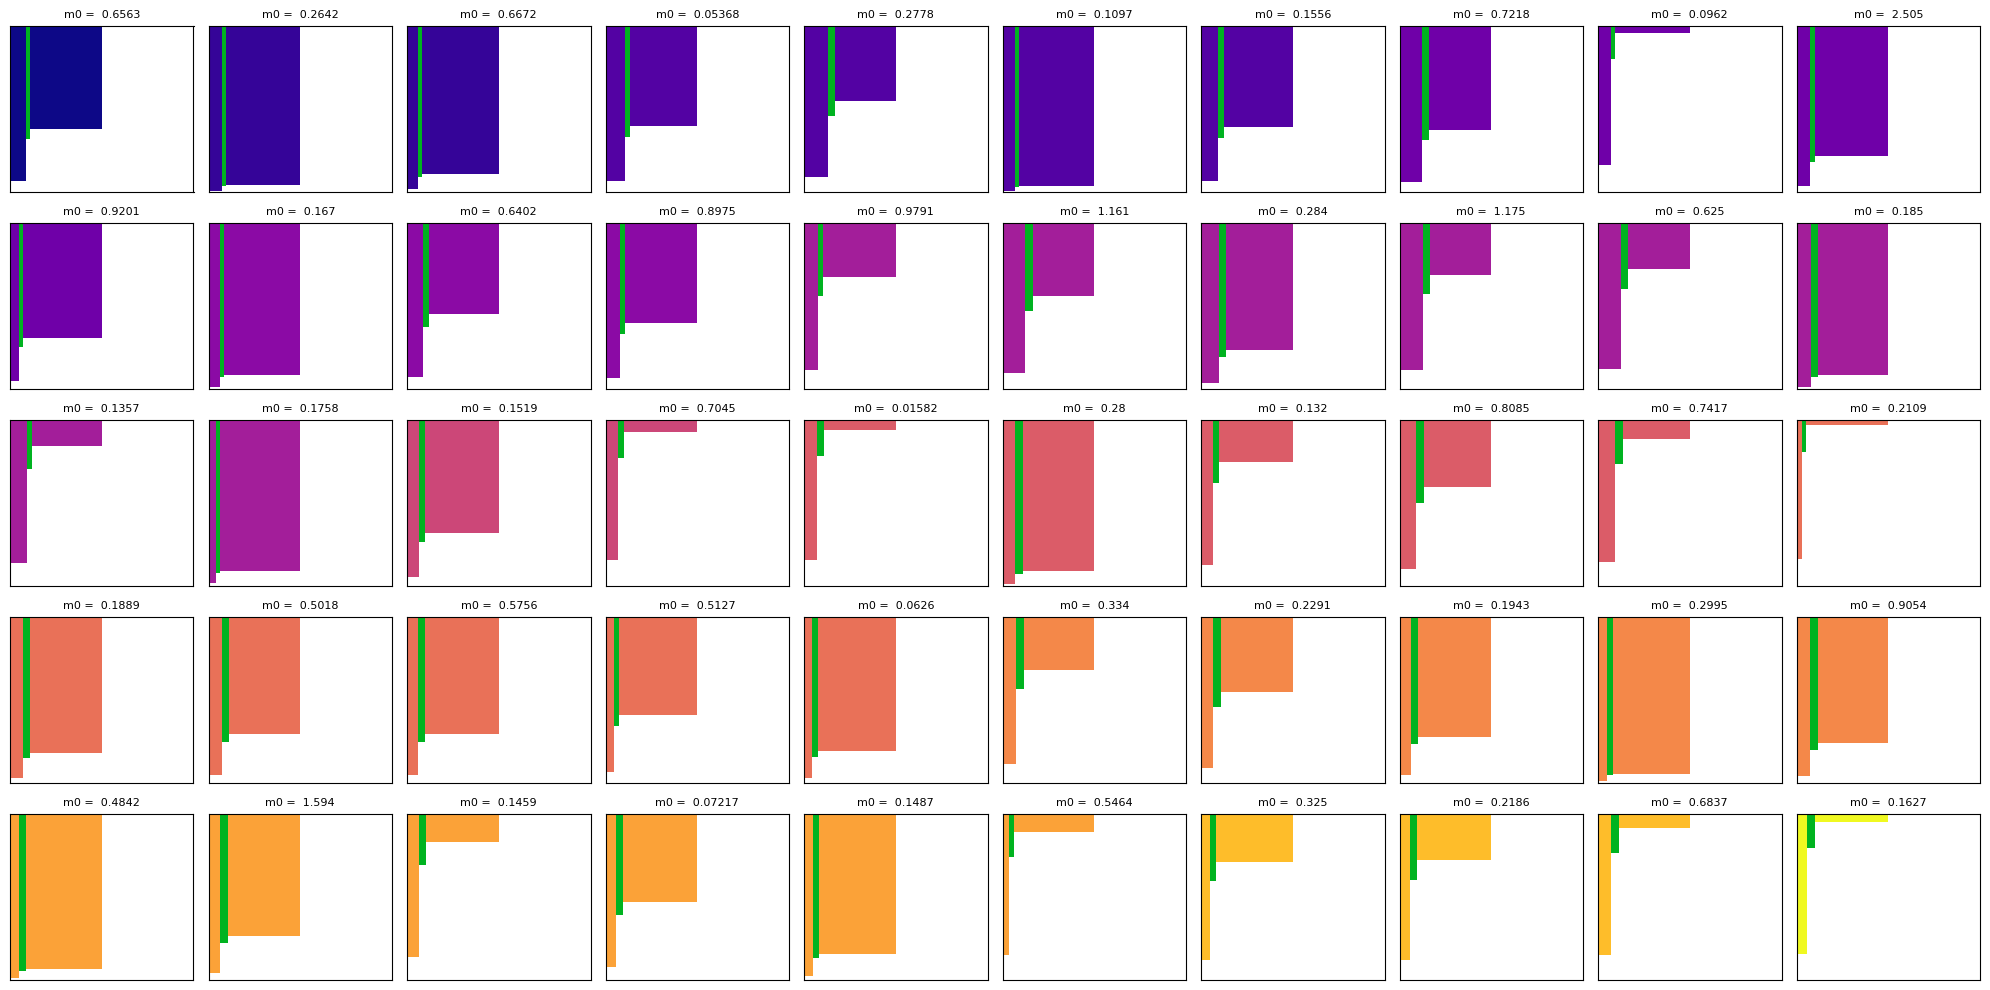

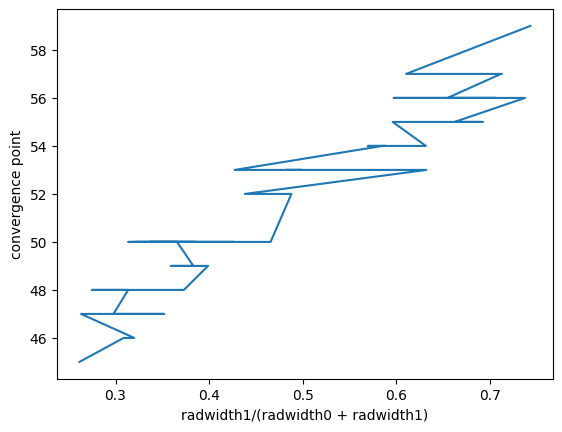

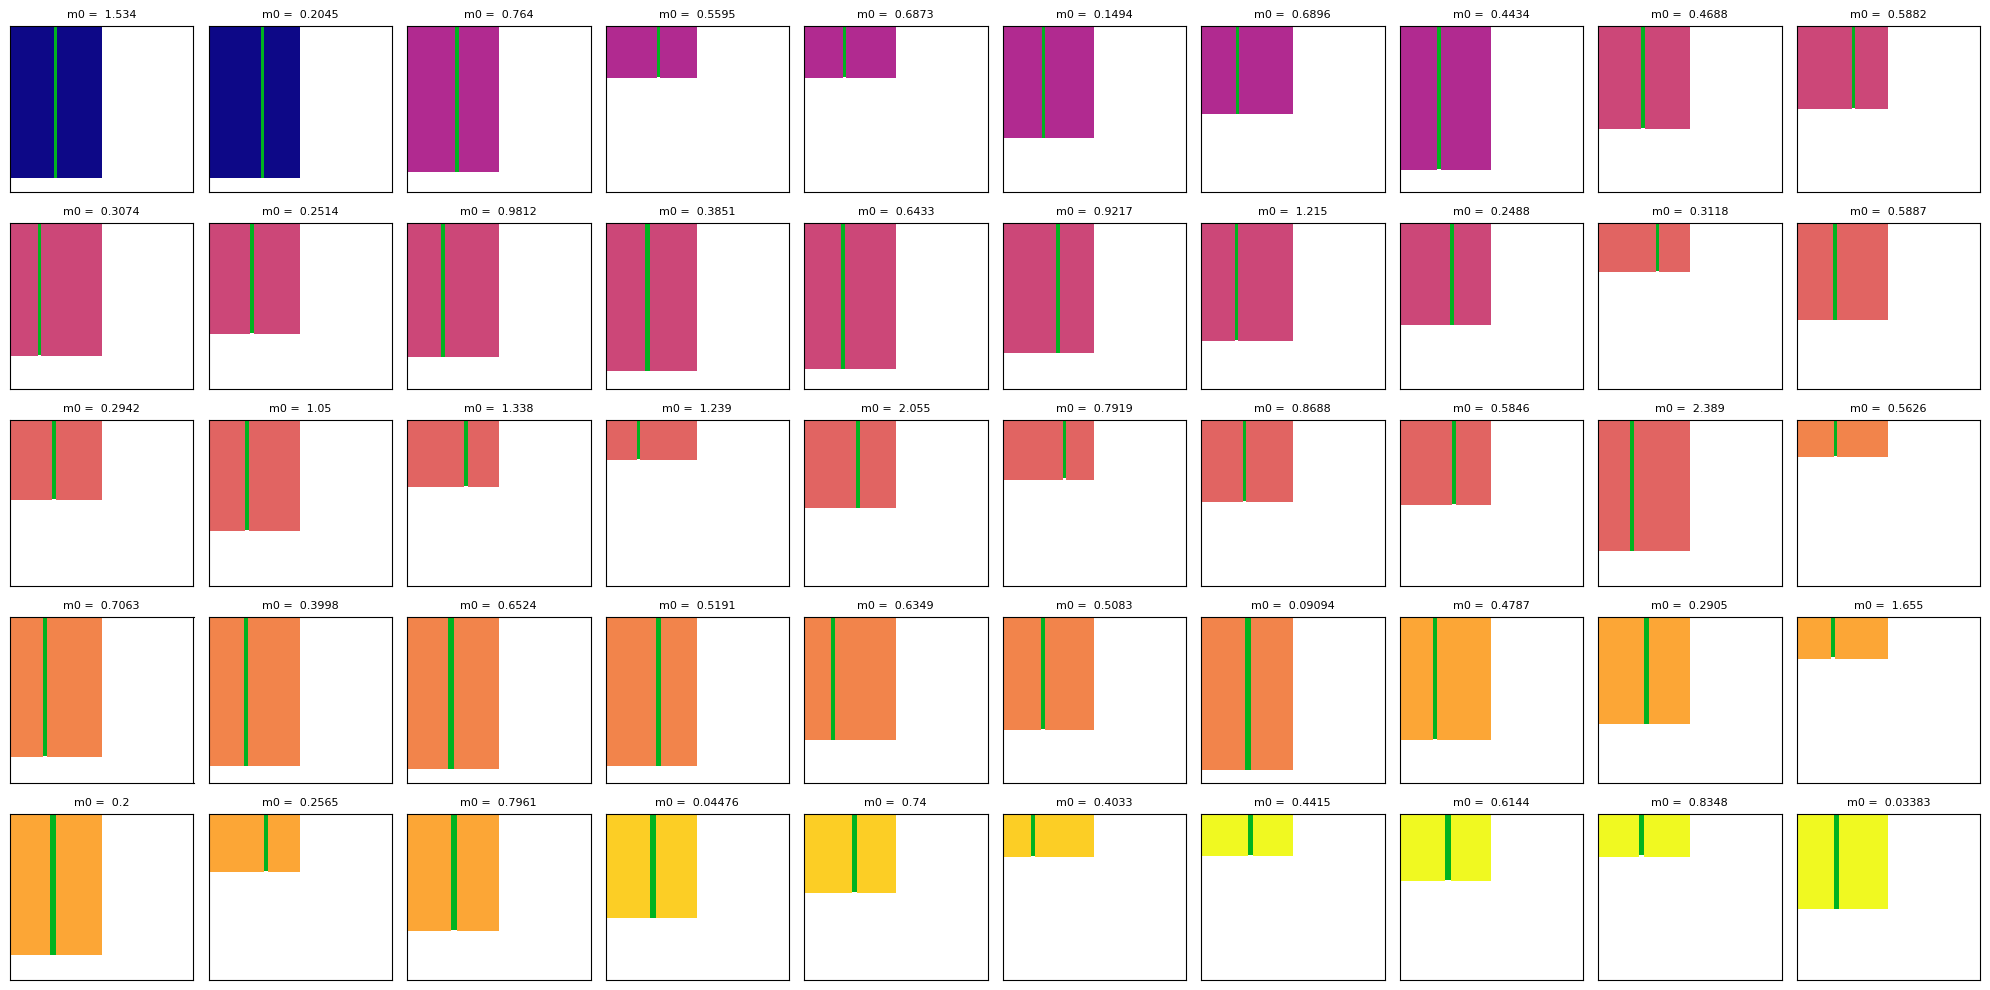

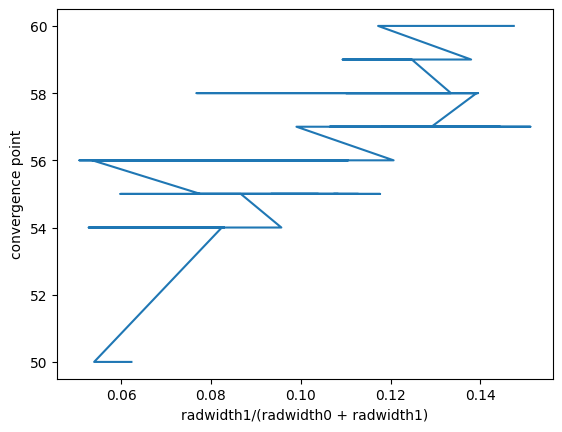

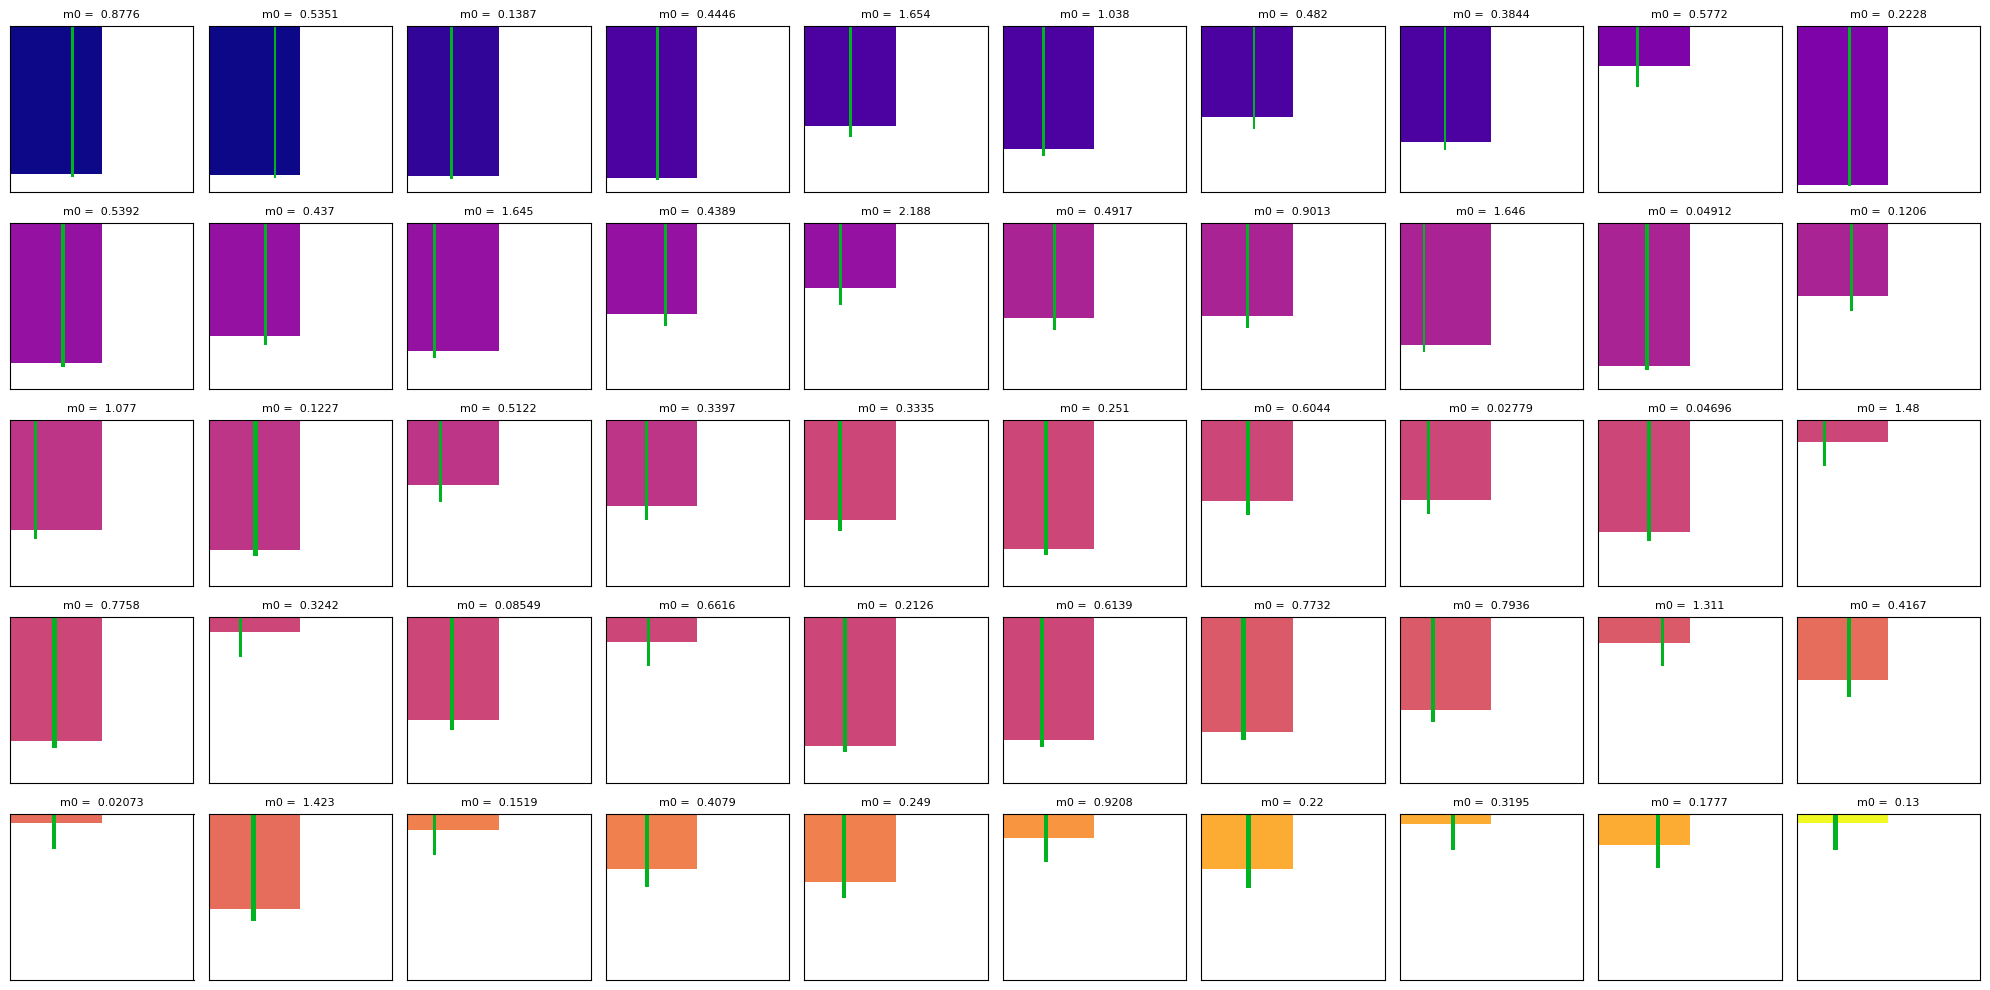

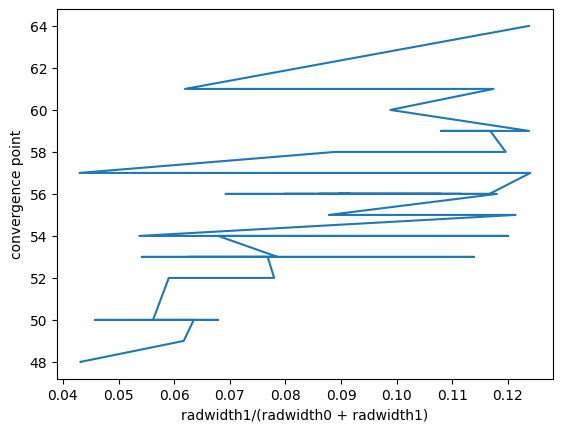

In [35]:
for idx in am_wide_variation_cases:
  plot_varied_cases(fixed_prob_lsts, idx, "am")

In [29]:
file2 = "predetermined_1.pkl"

height_ratios = list(np.linspace(0.2, 0.8, 4)) + list(np.linspace(0.9, 1.1, 21)) + list(np.linspace(1.2, 2, 5))
hmdrs = list(np.linspace(2, 20, 10))

def populate_d_a2(h, left_ratio, right_ratio, hmdr):
  hmd1 = 10
  hmd0 = left_ratio * hmd1
  hmd2 = right_ratio * hmd1
  radwidth0 = hmd0/3
  radwidth1 = hmd1/hmdr
  radwidth2 = hmd2/3
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a

h = 30
m0 = 1

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [0, 1, 0]
rho = 1023

# all_prob_dicts = []
# prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
# mk = prob.m_k
# for hmdr in hmdrs:
#   for left_ratio in height_ratios:
#     for right_ratio in height_ratios:
#       d, a = populate_d_a2(h, left_ratio, right_ratio, hmdr)
#       info = {"h" : h,
#               "d" : d,
#               "a" : a,
#               "region" : 1,
#               "m0s" : [m0]}
#       swap_vals(prob, d, a)
#       data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#       all_prob_dicts.append(data_dict)
#     update_data_file(all_prob_dicts, file2)
#     print("Finished a left ratio.")
#   print("Finished an hmdr.")


In [30]:
# Extract data and add convergence metrics to the dictionaries
all_prob_dicts = open_pkl_file(file2)
generate_convergence_data(all_prob_dicts, [0.01, 0.005])
log_data = generate_log_data(all_prob_dicts)

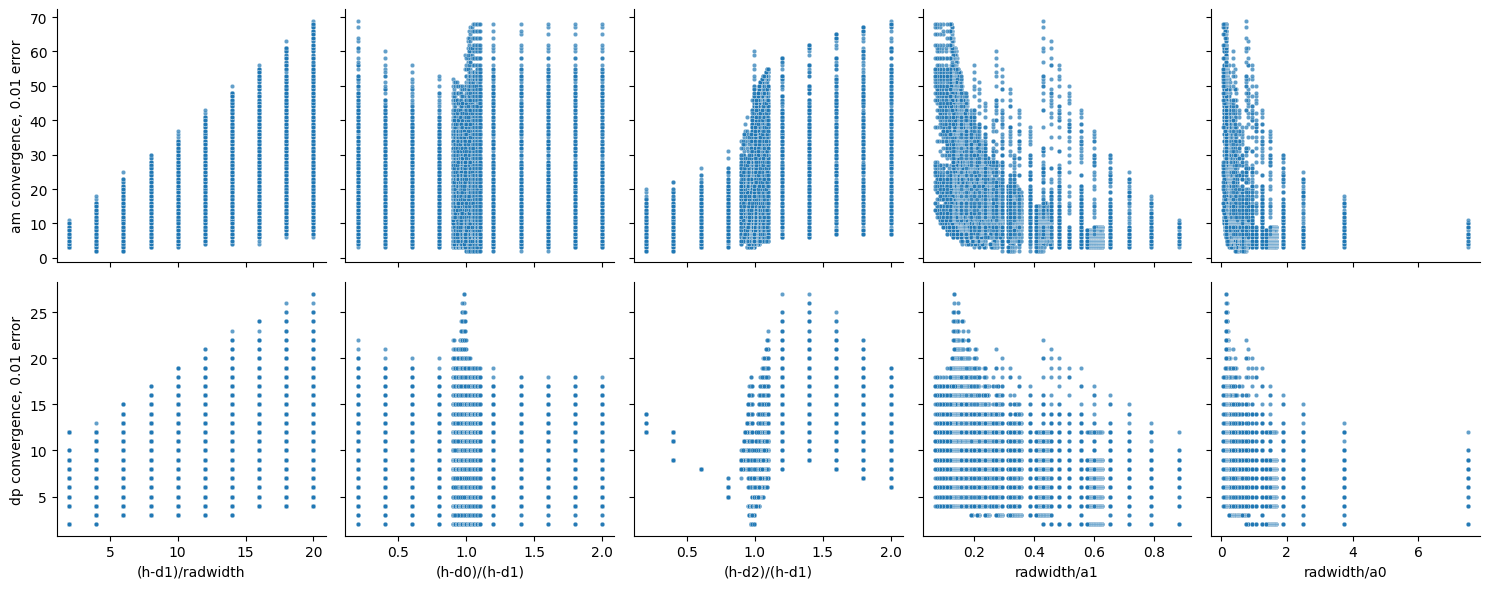

In [42]:
# Plot convergence point on y, various on x.
def xf1(config, m0):
  return (config["h"] - config["d"][1])/(config["a"][1] - config["a"][0])

def xf2(config, m0):
  return (config["h"] - config["d"][0])/(config["h"] - config["d"][1])

def xf3(config, m0):
  return (config["h"] - config["d"][2])/(config["h"] - config["d"][1])

def xf4(config, m0):
  return (config["a"][1] - config["a"][0])/(config["a"][1])

def xf5(config, m0):
  return (config["a"][1] - config["a"][0])/(config["a"][0])

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {"(h-d1)/radwidth" : xf1,
           "(h-d0)/(h-d1)" : xf2,
           "(h-d2)/(h-d1)" : xf3,
           "radwidth/a1" : xf4,
           "radwidth/a0" : xf5}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

plot_relation_grid(all_prob_dicts, x_funcs, y_funcs)

In [40]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

def right_ratio(data_dict):
  region = data_dict["region"]
  if region == (len(data_dict["d"]) - 1):
     return data_dict["h"]/(data_dict["h"] - data_dict["d"][region])
  else:
    return (data_dict["h"] - data_dict["d"][region + 1])/(data_dict["h"] - data_dict["d"][region])
    
def left_ratio(data_dict):
  region = data_dict["region"]
  if region == 0:
     return 0
  else:
    return (data_dict["h"] - data_dict["d"][region - 1])/(data_dict["h"] - data_dict["d"][region])
  
def rad_ratio(data_dict):
  region = data_dict["region"]
  radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
  return radwidth/data_dict["a"][region]

def rad_ratio2(data_dict):
  region = data_dict["region"]
  radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
  return radwidth/data_dict["a"][region - 1]

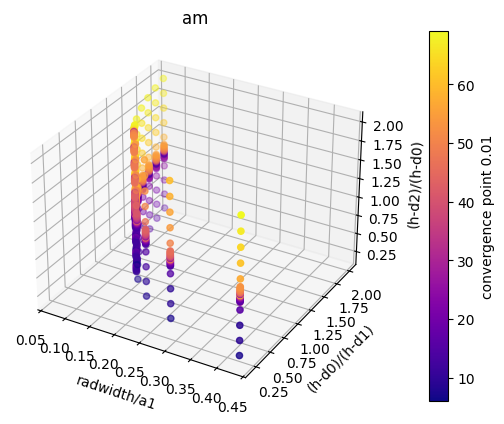

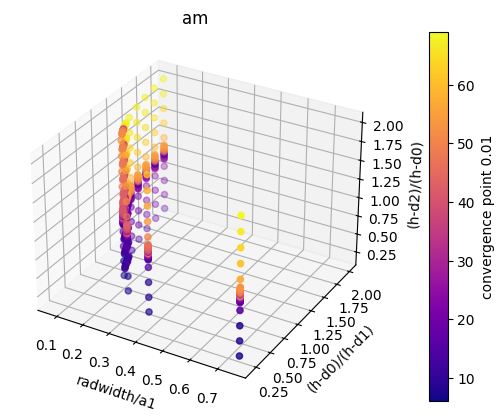

In [41]:
# plot_hydros_against_3(all_prob_dicts, "am", 0.01,
#                       wrap_m0(h_minus_d_over_radwidth),
#                       wrap_m0(left_ratio), wrap_m0(right_ratio),
#                       "(h-d1)/radwidth", "(h-d0)/(h-d1)", "(h-d2)/(h-d0)")

subset = [prob for prob in all_prob_dicts if (abs(h_minus_d_over_radwidth(prob) - 20) < 0.01)]
plot_hydros_against_3(subset, "am", 0.01,
                      wrap_m0(rad_ratio),
                      wrap_m0(left_ratio), wrap_m0(right_ratio),
                      "radwidth/a1", "(h-d0)/(h-d1)", "(h-d2)/(h-d0)")

subset = [prob for prob in all_prob_dicts if (abs(h_minus_d_over_radwidth(prob) - 20) < 0.01)]
plot_hydros_against_3(subset, "am", 0.01,
                      wrap_m0(rad_ratio2),
                      wrap_m0(left_ratio), wrap_m0(right_ratio),
                      "radwidth/a1", "(h-d0)/(h-d1)", "(h-d2)/(h-d0)")

In [17]:
def restrict(all_data, f, val):
  return [data_dict for data_dict in all_data if (abs(f(data_dict) - val) < 0.001)]
# Use this function to extract a slice of the same parameter value to plot in 2D

def plot_left_and_hmdr(data, val, error = 0.01):
  data = restrict(data, right_ratio, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(left_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d0)/(h-d1)", "(h-d1)/radwidth")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(left_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d0)/(h-d1)", "(h-d1)/radwidth")
  
def plot_right_and_hmdr(data, val, error = 0.01):
  data = restrict(data, left_ratio, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(right_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d2)/(h-d1)", "(h-d1)/radwidth")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(right_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d2)/(h-d1)", "(h-d1)/radwidth")
  
def plot_left_and_right(data, val, error = 0.01):
  data = restrict(data, h_minus_d_over_radwidth, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(left_ratio),
                        wrap_m0(right_ratio),
                        "(h-d0)/(h-d1)", "(h-d2)/(h-d1)")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(left_ratio),
                        wrap_m0(right_ratio),
                        "(h-d0)/(h-d1)", "(h-d2)/(h-d1)")

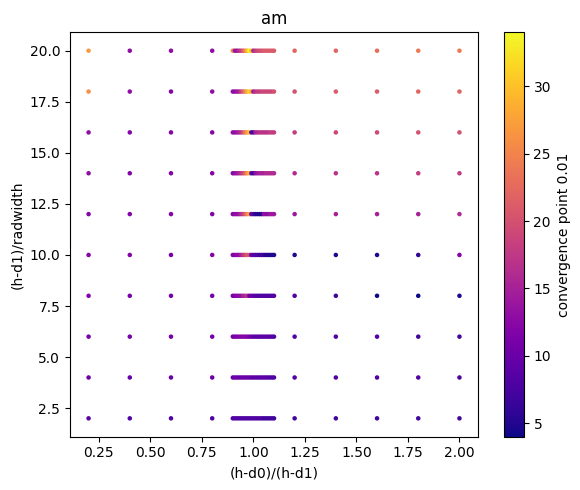

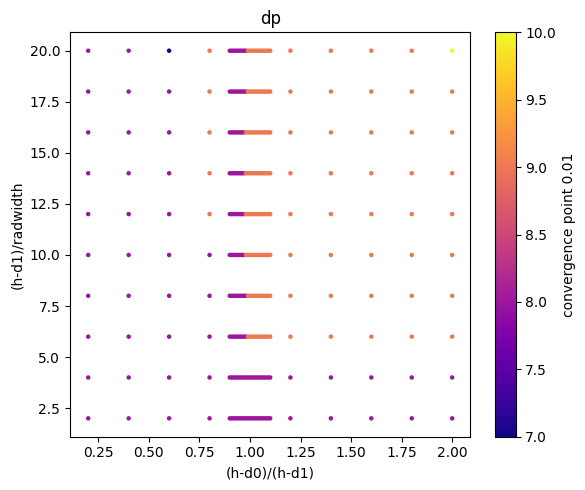

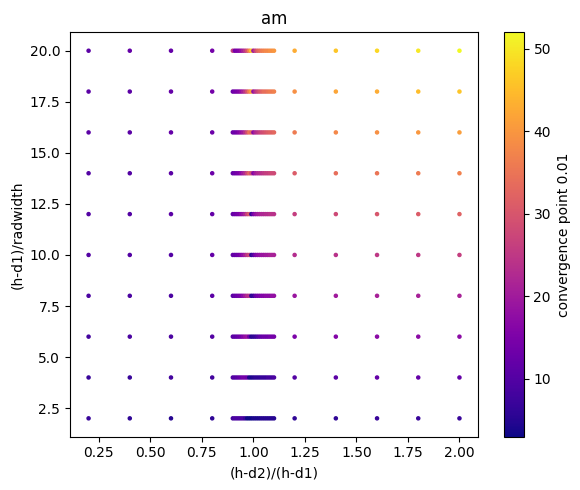

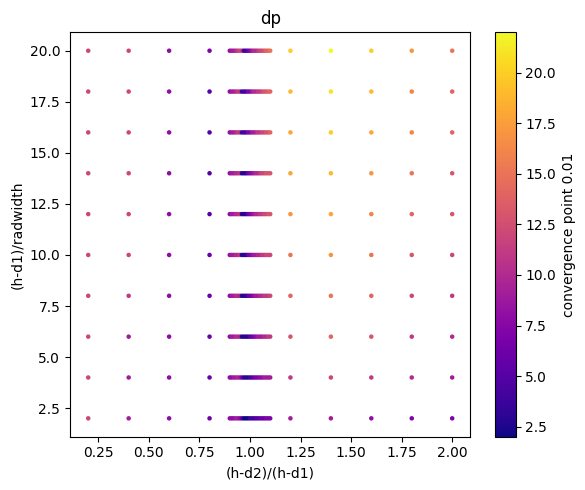

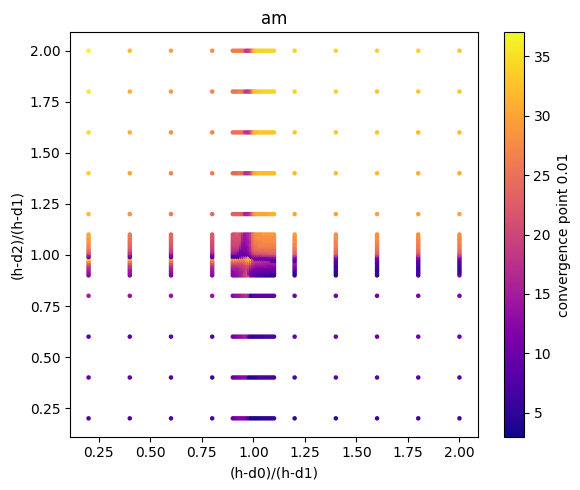

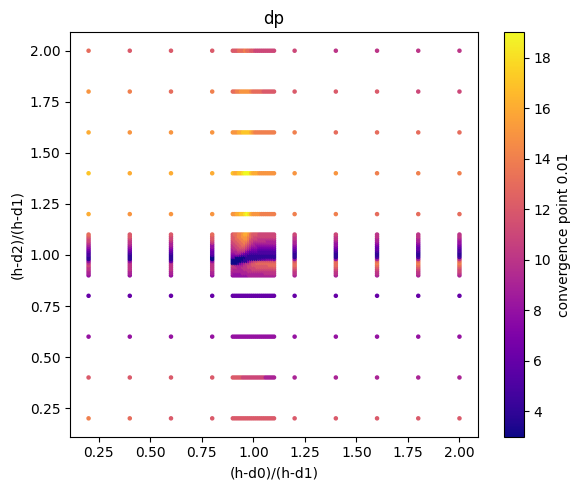

In [18]:
plot_left_and_hmdr(all_prob_dicts, 0.9)
plot_right_and_hmdr(all_prob_dicts, 0.9)
plot_left_and_right(all_prob_dicts, 10)

In [ ]:
subset = [prob for prob in all_prob_dicts if left_ratio(prob) < 0.8]
plot_left_and_hmdr(all_prob_dicts, 0.9)
subset = [prob for prob in all_prob_dicts if right_ratio(prob) < 0.8]
plot_right_and_hmdr(all_prob_dicts, 0.9)

In [ ]:
# Fix the (h-d)/radwidth, because that behavior appears monotonic.
# Vary the (h-d0)/(h-d1) and (h-d2)/(h-d1) ratios to get a better idea of what they look like.